In [1]:
import open3d as o3d
import matplotlib.pyplot as plt
import pyrealsense2 as rs
import glob
import numpy as np
import imageio
import os

try:
    os.mkdir('RGB/')
    os.mkdir('depth/')
except FileExistsError:
    pass

try:
    os.mkdir('depth/')
except FileExistsError:
    pass


video_names = glob.glob('Videos/*')
print(len(video_names))
n = 1000
j = 0
for i in range(0, len(video_names)):
    pipeline = rs.pipeline()
    config = rs.config()
    config.enable_device_from_file(video_names[i])
    config.enable_stream(rs.stream.depth, rs.format.z16, 15)
    config.enable_stream(rs.stream.color, rs.format.rgb8, 15)
    profile = pipeline.start(config)
    
    profile.get_device().as_playback().set_real_time(False)
    
#     device = profile.get_device()
#     playback = rs.playback(device)
#     playback.set_real_time(False)
#     print(rs.frame_queue.capacity)
    frames = pipeline.wait_for_frames()
    depth_frame = frames.get_depth_frame()
    depth_image_first = np.asanyarray(depth_frame.get_data())



    while True:
        frames = pipeline.wait_for_frames()

        depth_frame = frames.get_depth_frame()
        color_frame = frames.get_color_frame()
        depth_image = np.asanyarray(depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())
        imageio.imwrite('RGB/rgb_'+str(i)+'_'+str(j)+'.tiff', color_image)
        imageio.imwrite('depth/depth_'+str(i)+'_'+str(j)+'.tiff', depth_image)
        j+=1
        if (depth_image_first == depth_image).all():
            break


#     plt.figure()
#     plt.subplot(1, 2, 1)
#     plt.imshow(color_image)
#     plt.subplot(1, 2, 2)
#     plt.imshow(depth_image)
#     print(np.max(depth_image))
    
    pipeline.stop()

3


RuntimeError: Failed to resolve request. Request to enable_device_from_file("Videos\Videos.zip") was invalid, Reason: Failed to create ros reader: Error reading version line

In [1]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import imageio
import time
import cv2
import glob

pipeline = rs.pipeline()
config = rs.config()

filenames = glob.glob('Videos/*.bag')



#config.enable_stream(rs.stream.depth, rs.format.z16, 30)



cv2.namedWindow("Depth Stream", cv2.WINDOW_AUTOSIZE)
colorizer = rs.colorizer()

decimation = rs.decimation_filter()
decimation.set_option(rs.option.filter_magnitude, 1)

spatial = rs.spatial_filter()
spatial.set_option(rs.option.filter_magnitude, 5)
spatial.set_option(rs.option.filter_smooth_alpha, 1)
spatial.set_option(rs.option.filter_smooth_delta, 50)
spatial.set_option(rs.option.holes_fill, 2)

i = 0
config.enable_device_from_file(filenames[0], False)
pipeline.start(config)
    
    
while True:
    
    frames = pipeline.wait_for_frames()

        # Get depth frame
    depth_frame = frames.get_depth_frame()
    
    decimated_depth = decimation.process(depth_frame)
    filtered_depth = spatial.process(decimated_depth)
        # Colorize depth frame to jet colormap
    depth_color_frame = colorizer.colorize(filtered_depth)

        # Convert depth_frame to numpy array to render image in opencv
    depth_color_image = np.asanyarray(depth_color_frame.get_data())

        # Render image in opencv window
    cv2.imshow("Depth Stream", depth_color_image)
    key = cv2.waitKey(1)
        # if pressed escape exit program
    i+=1
    #pipeline.stop()
    if key == 27:
        cv2.destroyAllWindows()
        break
            
            


RuntimeError: Frame didn't arrive within 5000

In [4]:
def extract_tiff_from_bag(filename, destination):
    pipeline = rs.pipeline()
    config = rs.config()
    config.enable_device_from_file(filename, False)
    pipeline.start(config)
    
    
    decimation = rs.decimation_filter()
    decimation.set_option(rs.option.filter_magnitude, 1)

    spatial = rs.spatial_filter()
    spatial.set_option(rs.option.filter_magnitude, 5)
    spatial.set_option(rs.option.filter_smooth_alpha, 1)
    spatial.set_option(rs.option.filter_smooth_delta, 50)
    spatial.set_option(rs.option.holes_fill, 2)

    i = 0
    while True:
        try:
            frames = pipeline.wait_for_frames()
            depth_frame = frames.get_depth_frame()
            
            decimated_depth = decimation.process(depth_frame)
            filtered_depth = spatial.process(decimated_depth)
            depth_image = np.asanyarray(filtered_depth.get_data())
            imageio.imwrite(destination+f'{i}.tif', depth_image, 'TIFF')
            time.sleep(0.01)
            i+=1
            
        except RuntimeError:
            pipeline.stop()
            break
    return
    
    

In [8]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import imageio
import time
import cv2
import glob
import os

filenames = glob.glob('Videos/*.bag')
# print(filenames)
destinations = []

for i in range(0, len(filenames)):
    os.chdir('tiffs_from_videos')
    #os.mkdir(os.path.basename(filenames[i])[0:-4])
    destinations.append('\\Users\\zacha\\Documents\\Precision Ranching Code\\tiffs_from_videos\\'+os.path.basename(filenames[i])[0:-4]+'\\')
    os.chdir('..')
    
# print(destinations)

for i in range(0, len(filenames)):
    extract_tiff_from_bag(filenames[i], destinations[i])

['Videos\\marginal_cow_0.bag', 'Videos\\marginal_cow_1.bag', 'Videos\\marginal_cow_2.bag', 'Videos\\marginal_cow_3.bag', 'Videos\\marginal_cow_4.bag', 'Videos\\white_cow_0.bag', 'Videos\\white_cow_1.bag', 'Videos\\white_cow_2.bag', 'Videos\\white_cow_3.bag', 'Videos\\white_cow_4.bag']
['\\Users\\zacha\\Documents\\Precision Ranching Code\\tiffs_from_videos\\marginal_cow_0\\', '\\Users\\zacha\\Documents\\Precision Ranching Code\\tiffs_from_videos\\marginal_cow_1\\', '\\Users\\zacha\\Documents\\Precision Ranching Code\\tiffs_from_videos\\marginal_cow_2\\', '\\Users\\zacha\\Documents\\Precision Ranching Code\\tiffs_from_videos\\marginal_cow_3\\', '\\Users\\zacha\\Documents\\Precision Ranching Code\\tiffs_from_videos\\marginal_cow_4\\', '\\Users\\zacha\\Documents\\Precision Ranching Code\\tiffs_from_videos\\white_cow_0\\', '\\Users\\zacha\\Documents\\Precision Ranching Code\\tiffs_from_videos\\white_cow_1\\', '\\Users\\zacha\\Documents\\Precision Ranching Code\\tiffs_from_videos\\white_cow_

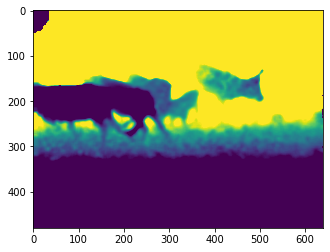

In [22]:

im = imageio.imread('tiffs_from_videos/marginal_cow_0/0.tif')

plt.figure()
plt.imshow(im, vmin = 3500, vmax=4500)